In [3]:
!pip install xgboost

     |████████████████████████████████| 166.7 MB 43 kB/s  eta 0:00:01    |████▊                           | 24.5 MB 329 kB/s eta 0:07:12     |█████████████████▏              | 89.7 MB 4.9 MB/s eta 0:00:16     |█████████████████████▉          | 113.8 MB 5.5 MB/s eta 0:00:10     |██████████████████████          | 114.6 MB 5.5 MB/s eta 0:00:10     |████████████████████████████    | 145.6 MB 5.7 MB/s eta 0:00:04


In [4]:
!pip install shap-hypetune

     |████████████████████████████████| 356 kB 6.5 MB/s eta 0:00:01
  Created wheel for shap: filename=shap-0.39.0-cp39-cp39-linux_x86_64.whl size=418998 sha256=2718b633a05eef56d2cf265732acc81f2d675c4724cfe93b7ad3be4a3ad79d7f
  Stored in directory: /home/jovyan/.cache/pip/wheels/bb/91/16/f6a057925f93af7e4281f6afce3495b595b473342766eb451c
Successfully built shap


In [7]:
import numpy as np
np.random.seed(777)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

In [8]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,...,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,...,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2


In [9]:
test_df = pd.read_csv('test.csv')
test_df.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
0,200000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200001,1,2,0,0,0,0,0,0,0,...,3,1,3,0,0,0,0,3,0,0
2,200002,0,1,7,1,0,0,0,0,6,...,3,0,0,0,0,3,0,2,0,0
3,200003,0,0,0,4,3,1,0,0,0,...,0,0,0,1,0,0,0,4,0,0
4,200004,0,0,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [89]:
train_results = pd.DataFrame(columns = ['percent', 'depth', 'missing_features', 'log_loss'])

<AxesSubplot:xlabel='target', ylabel='count'>

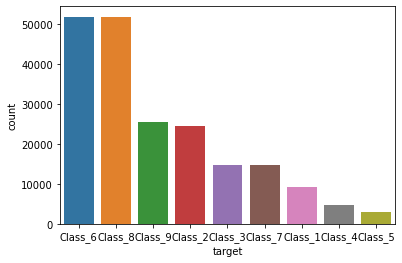

In [10]:
sns.countplot(x="target", data=train_df, order=train_df['target'].value_counts().index)

In [11]:
train_no_predict = train_df.drop(['id', 'target'], 1)
train_predict = train_df['target']

X_train, X_test, y_train, y_test = train_test_split(train_no_predict, train_predict, stratify=train_predict, train_size=0.10)
print('train count: ', len(y_train))
print('test count: ', len(y_test))

train count:  20000
test count:  180000


In [12]:
from shaphypetune import BoostRFE

model = BoostRFE(XGBClassifier(), 
                 min_features_to_select=1, step=1,
                 importance_type='shap_importances', train_importance=False)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=6, verbose=0)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:49:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[15:51:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:53:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:55:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:57:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

<shaphypetune.BoostRFE>

In [21]:
print(model.estimator_)
print(model.n_features_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
61


In [66]:
dir(model)
print(model.ranking_)
dir(model.estimator_)
#model.ranking_
model.estimator_.evals_result_

good_feature_indexes = np.argwhere(model.ranking_ <= 1)
features_to_use = X_train.columns[good_feature_indexes]
print('to_use', features_to_use)


bad_feature_indexes = np.argwhere(model.ranking_ > 1)
features_to_avoid = X_train.columns[bad_feature_indexes]
print('to_avoid', features_to_avoid)

[ 7  1  1  1  1  1  9 14  1  1  1  2  1  1  1  5  1  1  1  1  1  1 12  1
  4  1  1  6  1  1  1  1  1  1  1  3 11  1  1  1  1 13  8  1  1  1  1 15
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 10]
to_use [['feature_1']
 ['feature_2']
 ['feature_3']
 ['feature_4']
 ['feature_5']
 ['feature_8']
 ['feature_9']
 ['feature_10']
 ['feature_12']
 ['feature_13']
 ['feature_14']
 ['feature_16']
 ['feature_17']
 ['feature_18']
 ['feature_19']
 ['feature_20']
 ['feature_21']
 ['feature_23']
 ['feature_25']
 ['feature_26']
 ['feature_28']
 ['feature_29']
 ['feature_30']
 ['feature_31']
 ['feature_32']
 ['feature_33']
 ['feature_34']
 ['feature_37']
 ['feature_38']
 ['feature_39']
 ['feature_40']
 ['feature_43']
 ['feature_44']
 ['feature_45']
 ['feature_46']
 ['feature_48']
 ['feature_49']
 ['feature_50']
 ['feature_51']
 ['feature_52']
 ['feature_53']
 ['feature_54']
 ['feature_55']
 ['feature_56']
 ['feature_57']
 ['feature_58']
 ['feature_59']
 ['feature_60']
 [

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


In [72]:
for i, rank in enumerate(model.ranking_):
    feature = X_train.columns[i]
    print(feature, ':', rank)

feature_0 : 7
feature_1 : 1
feature_2 : 1
feature_3 : 1
feature_4 : 1
feature_5 : 1
feature_6 : 9
feature_7 : 14
feature_8 : 1
feature_9 : 1
feature_10 : 1
feature_11 : 2
feature_12 : 1
feature_13 : 1
feature_14 : 1
feature_15 : 5
feature_16 : 1
feature_17 : 1
feature_18 : 1
feature_19 : 1
feature_20 : 1
feature_21 : 1
feature_22 : 12
feature_23 : 1
feature_24 : 4
feature_25 : 1
feature_26 : 1
feature_27 : 6
feature_28 : 1
feature_29 : 1
feature_30 : 1
feature_31 : 1
feature_32 : 1
feature_33 : 1
feature_34 : 1
feature_35 : 3
feature_36 : 11
feature_37 : 1
feature_38 : 1
feature_39 : 1
feature_40 : 1
feature_41 : 13
feature_42 : 8
feature_43 : 1
feature_44 : 1
feature_45 : 1
feature_46 : 1
feature_47 : 15
feature_48 : 1
feature_49 : 1
feature_50 : 1
feature_51 : 1
feature_52 : 1
feature_53 : 1
feature_54 : 1
feature_55 : 1
feature_56 : 1
feature_57 : 1
feature_58 : 1
feature_59 : 1
feature_60 : 1
feature_61 : 1
feature_62 : 1
feature_63 : 1
feature_64 : 1
feature_65 : 1
feature_66 : 1


In [120]:
import datetime;
print(datetime.datetime.now())


X_train_without_worst = X_train.drop(['feature_0', 'feature_6', 'feature_7', 'feature_11', 'feature_15', 'feature_22',
                                      'feature_24', 'feature_27', 'feature_35', 'feature_36', 'feature_41', 'feature_42', 
                                      'feature_47', 'feature_74'], 1)
X_test_without_worst = X_test.drop(['feature_0', 'feature_6', 'feature_7', 'feature_11', 'feature_15', 'feature_22',
                                    'feature_24', 'feature_27', 'feature_35', 'feature_36', 'feature_41', 'feature_42', 
                                    'feature_47', 'feature_74'], 1)

xgb_model = XGBClassifier()
parameters = { 'seed': [777], 'n_estimators': [250], 
               'learning_rate': [0.05], 'max_depth': [5], 'subsample': [0.5] }

clf = GridSearchCV(xgb_model, parameters, 
                   cv=StratifiedKFold(n_splits=6, shuffle=True),
                   n_jobs=-1, verbose=2, refit=True, scoring='neg_log_loss')

clf.fit(X_train_without_worst, y_train)
print(datetime.datetime.now())

2021-06-18 23:44:14.897245
Fitting 6 folds for each of 1 candidates, totalling 6 fits


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[00:06:26] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
2021-06-19 00:07:12.995694


In [121]:
print(clf.best_params_)
print('test log_loss', clf.best_score_)

# run on the holdout data
test_probs = clf.predict_proba(X_test_without_worst)
the_log_loss = abs(log_loss(y_test, test_probs))
print(the_log_loss)

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 250, 'seed': 777, 'subsample': 0.5}
test log_loss -1.77760593672416
1.7721333809581896


In [122]:
new_row = {'percent':10, 'depth':5, 
           'missing_features': 'sub .5 - feature_0, feature_6, feature_7, feature_11, feature_15, feature_22 feature_24, feature_27, feature_35, feature_36, feature_41, feature_42, feature_47, feature_74', 
           'log_loss':the_log_loss }
train_results = train_results.append(new_row, ignore_index=True)

In [123]:
train_results

,percent,depth,missing_features,log_loss
0,10,3,"feature_7, feature_47",1.762934
1,10,3,feature_47,1.762744
2,10,3,"feature_0, feature_6, feature_7, feature_11, f...",1.764524
3,10,6,"feature_0, feature_6, feature_7, feature_11, f...",1.778152
4,10,5,"sub .5 - feature_0, feature_6, feature_7, feat...",1.772133
